In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('fifa21_male2.csv')

In [3]:
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [4]:
df.info('name')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column            Dtype  
---   ------            -----  
 0    ID                int64  
 1    Name              object 
 2    Age               int64  
 3    OVA               int64  
 4    Nationality       object 
 5    Club              object 
 6    BOV               int64  
 7    BP                object 
 8    Position          object 
 9    Player Photo      object 
 10   Club Logo         object 
 11   Flag Photo        object 
 12   POT               int64  
 13   Team & Contract   object 
 14   Height            object 
 15   Weight            object 
 16   foot              object 
 17   Growth            int64  
 18   Joined            object 
 19   Loan Date End     object 
 20   Value             object 
 21   Wage              object 
 22   Release Clause    object 
 23   Contract          object 
 24   Attacking         int64  
 25   Crossing          in

In [5]:
cols = []
for i in range (len(df.columns)):
    cols.append(df.columns[i].lower().replace(" ","_"))
print(cols)

['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp', 'position', 'player_photo', 'club_logo', 'flag_photo', 'pot', 'team_&_contract', 'height', 'weight', 'foot', 'growth', 'joined', 'loan_date_end', 'value', 'wage', 'release_clause', 'contract', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', '

In [6]:
df.columns = cols

In [7]:
df.isna().sum()

id             0
name           0
age            0
ova            0
nationality    0
              ..
cb             0
rcb            0
rb             0
gk             0
gender         0
Length: 107, dtype: int64

In [8]:
df_gk = df[['id','age','pot','bp','goalkeeping','gk_diving','gk_handling','gk_kicking','gk_positioning', 'gk_reflexes']]

In [9]:
df_gk.head()

,id,age,pot,bp,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2,33,69,LWB,56,14,5,15,10,12
1,16,37,71,CM,56,9,12,13,11,11
2,27,33,71,CAM,51,9,6,13,16,7
3,36,36,82,ST,68,5,21,64,21,21
4,41,36,81,CAM,45,6,13,6,13,7


In [10]:
df_gk.shape

(17125, 10)

In [11]:
df_gk.loc[df_gk['bp']=='GK']

,id,age,pot,bp,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
14,488,38,90,GK,346,83,88,62,92,83
18,684,42,73,GK,357,70,73,67,78,69
19,805,39,87,GK,323,77,82,75,88,76
20,1001,39,69,GK,340,71,70,60,71,68
26,1179,42,82,GK,396,77,76,74,91,78
...,...,...,...,...,...,...,...,...,...,...
17039,258872,18,67,GK,250,51,49,50,49,51
17061,258918,19,65,GK,246,50,48,46,48,54
17091,258983,19,69,GK,291,59,59,57,60,56
17100,259049,23,78,GK,370,74,74,75,74,73


In [12]:
df_gk.isna().sum()

id                0
age               0
pot               0
bp                0
goalkeeping       0
gk_diving         0
gk_handling       0
gk_kicking        0
gk_positioning    0
gk_reflexes       0
dtype: int64

In [13]:
df_gk.drop(['bp', 'id'], axis=1, inplace=True)

In [14]:
df_gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             17125 non-null  int64
 1   pot             17125 non-null  int64
 2   goalkeeping     17125 non-null  int64
 3   gk_diving       17125 non-null  int64
 4   gk_handling     17125 non-null  int64
 5   gk_kicking      17125 non-null  int64
 6   gk_positioning  17125 non-null  int64
 7   gk_reflexes     17125 non-null  int64
dtypes: int64(8)
memory usage: 1.0 MB


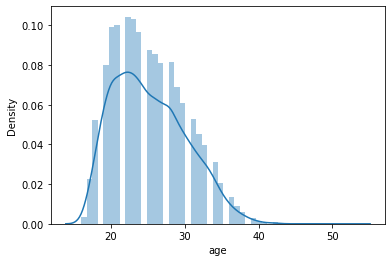

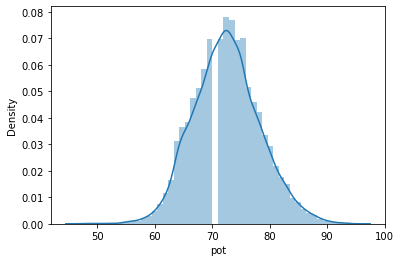

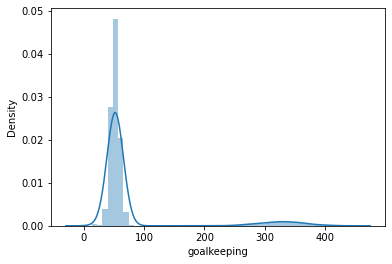

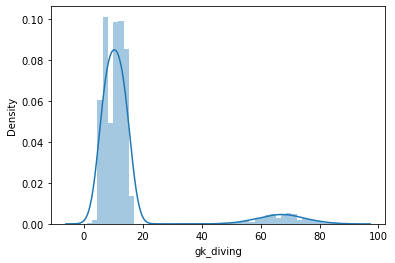

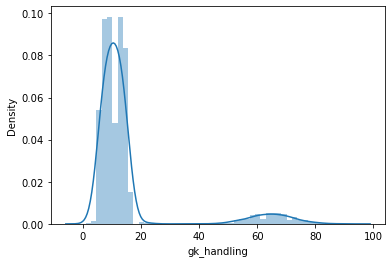

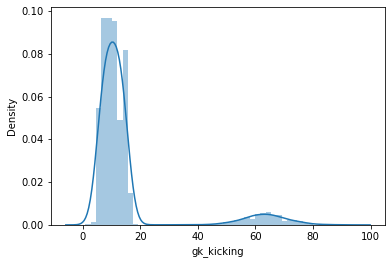

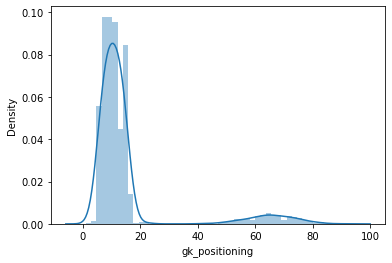

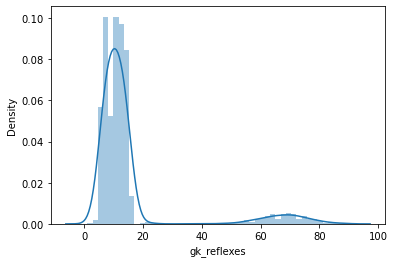

In [15]:
for column in df_gk.columns:
    sns.distplot(df_gk[column])
    plt.show()

In [16]:
df_gk.corr().apply(lambda x: round(x,2))

,age,pot,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
age,1.00,-0.24,0.13,0.12,0.13,0.13,0.13,0.12
pot,-0.24,1.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.01
goalkeeping,0.13,-0.01,1.00,0.99,0.99,0.97,0.99,0.99
gk_diving,0.12,-0.01,0.99,1.00,0.97,0.95,0.97,0.97
gk_handling,0.13,-0.01,0.99,0.97,1.00,0.95,0.97,0.97
gk_kicking,0.13,-0.00,0.97,0.95,0.95,1.00,0.95,0.95
gk_positioning,0.13,-0.00,0.99,0.97,0.97,0.95,1.00,0.97
gk_reflexes,0.12,-0.01,0.99,0.97,0.97,0.95,0.97,1.00


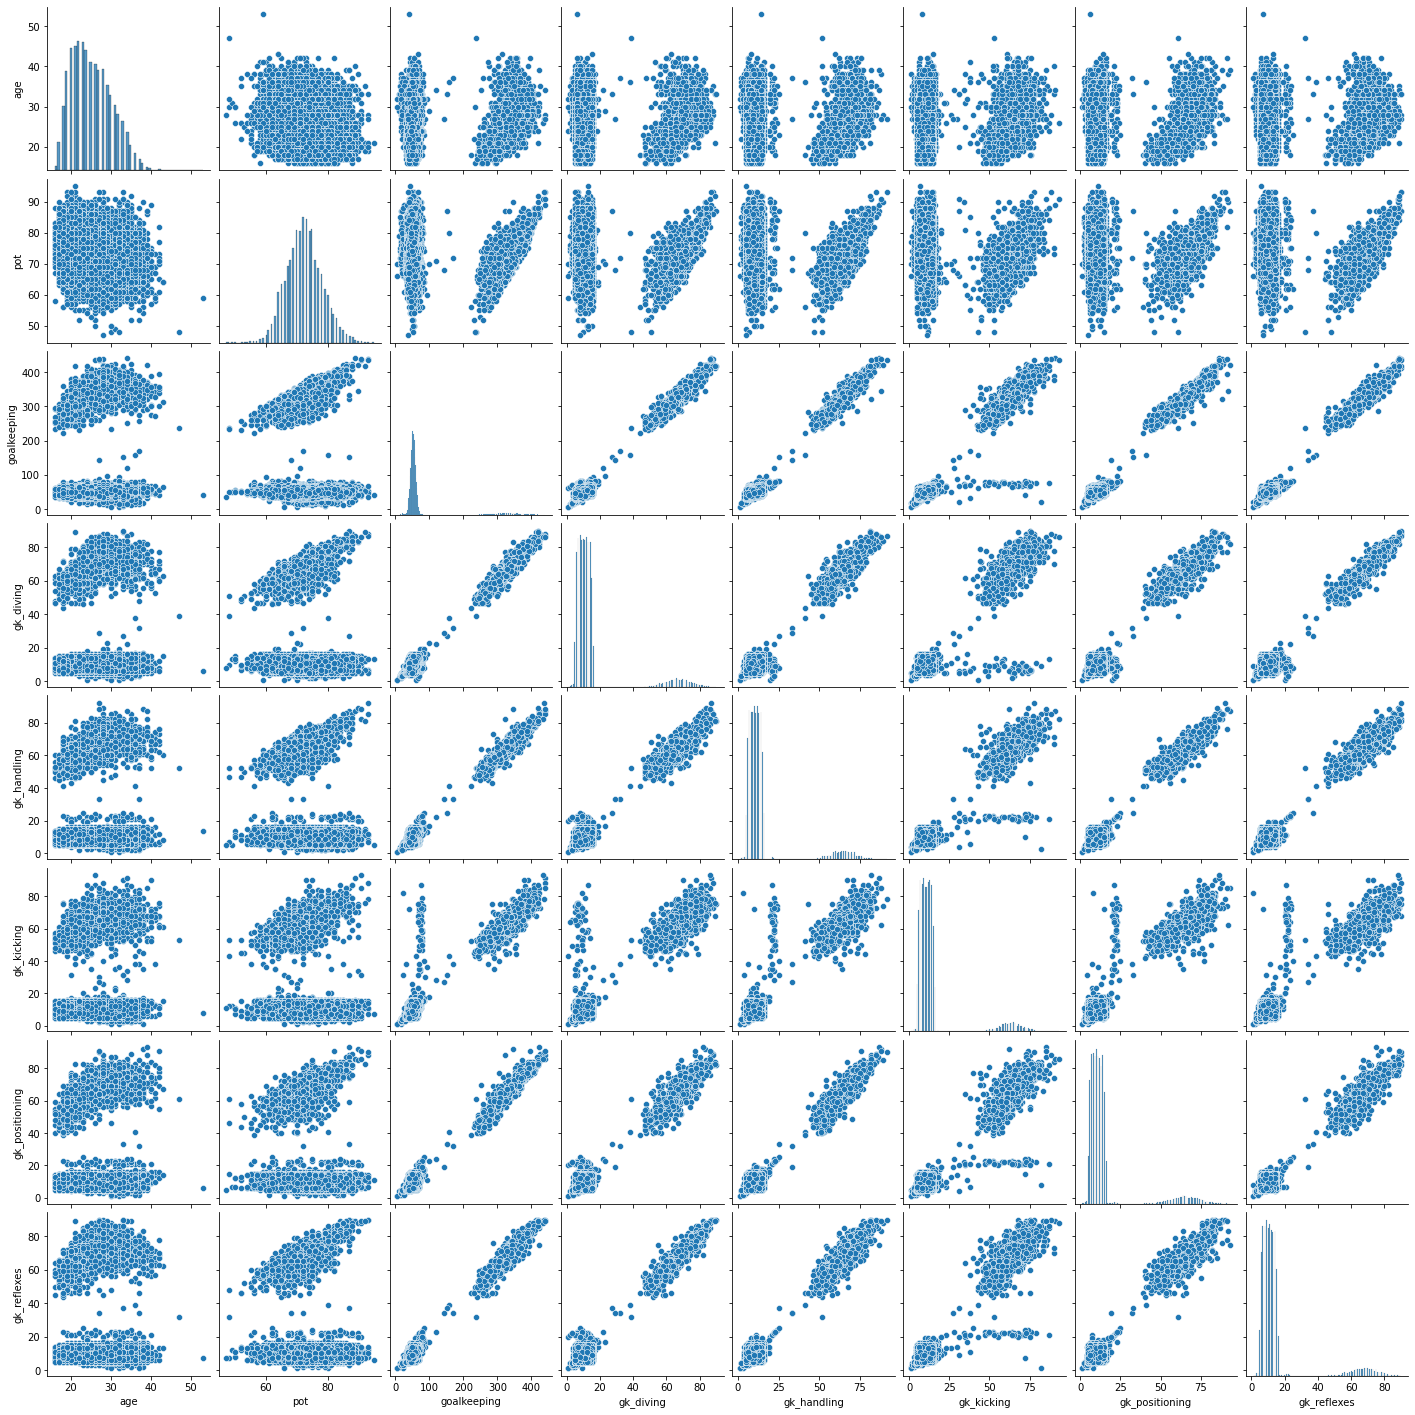

In [17]:
sns.pairplot(df_gk)

In [18]:
def boxcox_transform(df_gk):
    numeric_cols = df_gk.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        df_gk[column] = np.where(df_gk[column]<=0, np.NAN, df_gk[column]) 
        df_gk[column] = df_gk[column].fillna(df_gk[column].mean())
        transformed_data, ci = stats.boxcox(df_gk[column])
        df_gk[column] = transformed_data
        _ci[column] = [ci] 
    return df_gk, _ci
df_gk, _ci = boxcox_transform(df_gk)
df_gk.head()

,age,pot,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2.333615,13.172802,1.028941,1.190123,0.956792,1.209168,1.123424,1.158236
1,2.380795,13.376923,1.028941,1.110789,1.163142,1.186805,1.140941,1.143180
2,2.333615,13.376923,1.026811,1.110789,1.010981,1.186805,1.199238,1.047854
3,2.369619,14.448024,1.032801,0.958048,1.241419,1.344165,1.232703,1.235501
4,2.369619,14.353973,1.023647,1.012422,1.176342,1.017973,1.168884,1.047854


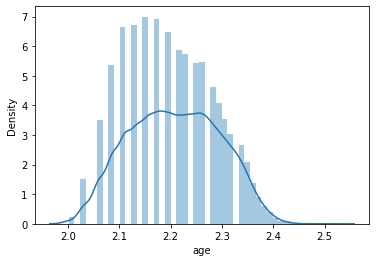

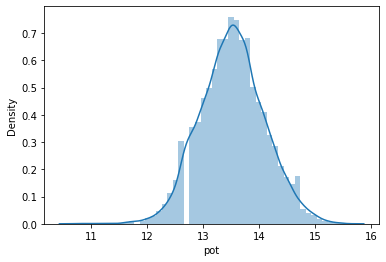

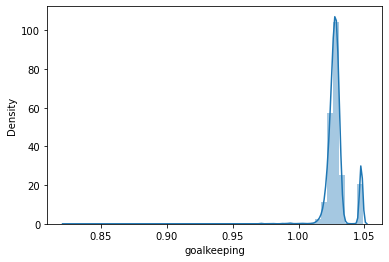

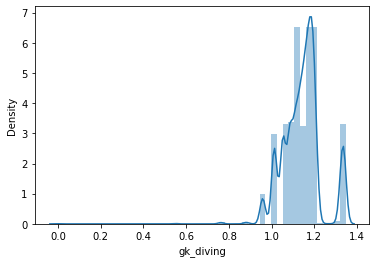

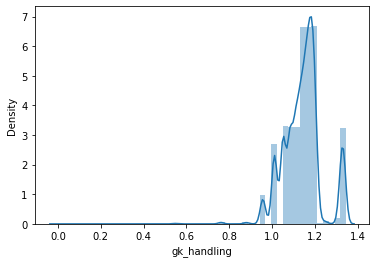

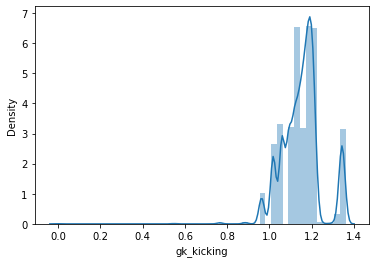

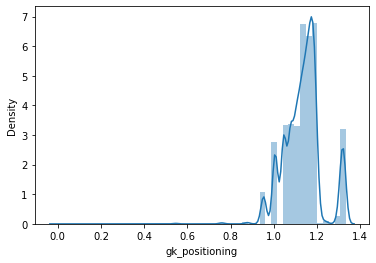

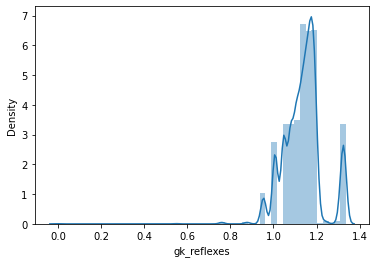

In [19]:
for column in df_gk.columns:
    sns.distplot(df_gk[column])
    plt.show()

In [20]:
def remove_outliers(df_gk, threshold=1.5, in_columns=df_gk.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df_gk[column],75)
            lower = np.percentile(df_gk[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df_gk = df_gk[(df_gk[column]>lower_limit) & (df_gk[column]<upper_limit)]
    return df_gk

In [21]:
transformer = MinMaxScaler().fit(df_gk)
x_minmax = transformer.transform(df_gk)
print(x_minmax.shape)

(17125, 8)


In [22]:
df_gk = pd.DataFrame(x_minmax,columns=df_gk.columns)
df_gk.head()

,age,pot,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0.639682,0.505121,0.912351,0.883083,0.711214,0.887961,0.841913,0.866468
1,0.730628,0.546423,0.912351,0.824216,0.864600,0.871539,0.855040,0.855204
2,0.639682,0.546423,0.902864,0.824216,0.751494,0.871539,0.898729,0.783892
3,0.709084,0.763147,0.929547,0.710881,0.922786,0.987097,0.923808,0.924269
4,0.709084,0.744117,0.888773,0.751227,0.874412,0.747556,0.875981,0.783892


In [23]:
y = df_gk["pot"]
X = df_gk.drop(['pot'], axis=1)
X.head()

,age,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0.639682,0.912351,0.883083,0.711214,0.887961,0.841913,0.866468
1,0.730628,0.912351,0.824216,0.864600,0.871539,0.855040,0.855204
2,0.639682,0.902864,0.824216,0.751494,0.871539,0.898729,0.783892
3,0.709084,0.929547,0.710881,0.922786,0.987097,0.923808,0.924269
4,0.709084,0.888773,0.751227,0.874412,0.747556,0.875981,0.783892


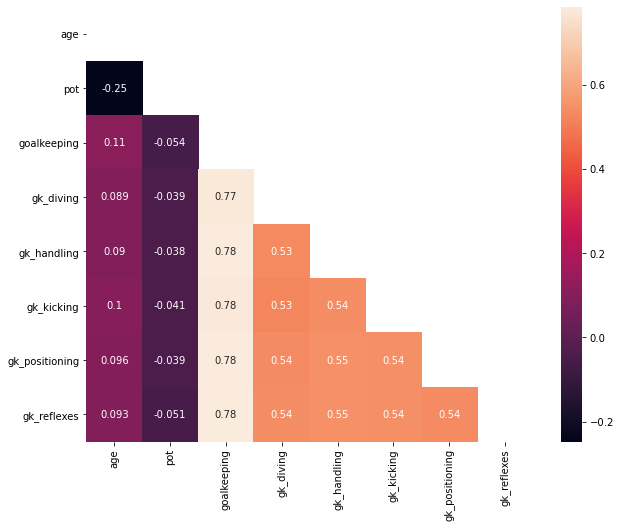

In [24]:
mask = np.zeros_like(df_gk.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_gk.corr(), mask=mask, annot=True)
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [26]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
len(X_train)

11987

In [28]:
predictions = model.predict(X_test)
predictions.shape

(5138,)

In [29]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE =", MAE)

r2 =  0.0620663265219108
RMSE =  0.11357560406840063
MSE =  0.012899417839502101
MAE = 0.08957534089651427
